In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import *

In [2]:
%matplotlib notebook

In [3]:
##code for Bayesian statistical error to use on ratio plots.
##Table from Xin, slack conversation

observed_n = np.arange(101)
OBSERVED_ERR_LO = np.array([0, 0, 0, 0.856632, 1.70317, 2.51005, 3.32075, 4.14046, 4.9693, 5.80646, 6.65117,
                            7.5025, 8.35978, 9.22237, 10.0898, 10.9615, 11.8372, 12.7165, 13.5992, 14.4849, 15.3734,
                            16.2646, 17.1583, 18.0543, 18.9524, 19.8526, 20.7547, 21.6586, 22.5642, 23.4715, 24.3803,
                            25.2906, 26.2023, 27.1153, 28.0297, 28.9452, 29.8619, 30.7797, 31.6987, 32.6187, 33.5396,
                            34.4616, 35.3845, 36.3083, 37.2329, 38.1584, 39.0847, 40.0118, 40.9396, 41.8682, 42.7975,
                            43.7275, 44.6581, 45.5895, 46.5215, 47.454, 48.3873, 49.321, 50.2554, 51.1903, 52.1257,
                            53.0617, 53.9982, 54.9352, 55.8727, 56.8107, 57.7491, 58.6881, 59.6274, 60.5673, 61.5075,
                            62.4482, 63.3892, 64.3307, 65.2725, 66.2148, 67.1575, 68.1005, 69.0438, 69.9876, 70.9317,
                            71.8761, 72.8209, 73.766, 74.7114, 75.6572, 76.6033, 77.5497, 78.4964, 79.4434, 80.3907,
                            81.3383, 82.2862, 83.2342, 84.1827, 85.1314, 86.0804, 87.0296, 87.9791, 88.9288, 89.8788])
OBSERVED_ERR_HI = np.array([1.1478, 2.35971, 3.51917, 4.72422, 5.98186, 7.21064, 8.41858, 9.61053, 10.7896, 11.9582, 13.1179,
                            14.27, 15.4155, 16.5552, 17.6898, 18.8197, 19.9454, 21.0673, 22.1858, 23.3011, 24.4133,
                            25.5229, 26.6299, 27.7346, 28.837, 29.9374, 31.0358, 32.1322, 33.2271, 34.3201, 35.4117,
                            36.5017, 37.5904, 38.6776, 39.7635, 40.8483, 41.9318, 43.0141, 44.0955, 45.1757, 46.2549,
                            47.3331, 48.4104, 49.4868, 50.5623, 51.637, 52.7108, 53.7839, 54.8561, 55.9277, 56.9985,
                            58.0686, 59.1381, 60.2068, 61.275, 62.3425, 63.4094, 64.4757, 65.5415, 66.6066, 67.6713,
                            68.7354, 69.7989, 70.862, 71.9246, 72.9866, 74.0483, 75.1094, 76.1701, 77.2304, 78.2902,
                            79.3496, 80.4085, 81.4672, 82.5253, 83.5831, 84.6406, 85.6976, 86.7542, 87.8105, 88.8665,
                            89.9221, 90.9774, 92.0323, 93.0869, 94.1411, 95.1951, 96.2488, 97.3021, 98.3552, 99.4079,
                            100.46, 101.513, 102.564, 103.616, 104.667, 105.718, 106.769, 107.82, 108.87, 109.92])

def bayes_stat_err(n):
    return (np.where(n<=100.,n-OBSERVED_ERR_LO[n],np.sqrt(n)),
            np.where(n<=100.,OBSERVED_ERR_HI[n]-n,np.sqrt(n)))

In [4]:
##define CNP err

def cnp_stat_err(exp,obs):
    with np.errstate(divide='ignore'):
        return np.where(obs>0,np.sqrt(3./((2./exp)+(1./obs))),exp*0.5)

In [5]:
## get all the types of stat errors...

def calculate_stat_errs(df,vals='expected_x0'):
    df['%s_err_stat_pearson'%vals] = np.sqrt(df[vals])
    df['%s_err_stat_cnp'%vals] = cnp_stat_err(df[vals],df['observed'])
    df['%s_err_stat_bayes_lo'%vals] = bayes_stat_err(df['observed'])[0]
    df['%s_err_stat_bayes_hi'%vals] = bayes_stat_err(df['observed'])[1]
    

In [6]:
#define DL data

#See DocDB 36232 for a review of all these numbers.

dl_data = { "name": "$1e1p$ CCQE",
           "e_sig": [(200,500)], #mev
           "observed": 6,
           "expected_nue": 6.8,
           "expected_nue_err_sys": 1.0,
           "expected_non_nue": 1.9,
           "expected_non_err_sys": 0.5,
           "expected_x0": 8.8,
           "expected_x0_err_sys": 1.1,
           "expected_elee": 9.7,
           "expected_elee_err_sys": 1.9,
           "expected_x1": 18.5,
           "expected_x1_err_sys": 2.9,
           #from DL PRD
           "chi2_x0": 25.28,
           "chi2_x1": 36.35,
           "chi2_df": 10,
           #pvalues for constrained H0/H1
           "p_x0": 0.014,
           "p_x1": 10**(-3.3),
           #pvalues for simple hypothesis test delta chi2
           "p_x0_x1": 1.-0.980, #assuming H0
           "p_x1_x0": 10**(-3.8), #assuming H1
           #from DL PRD
           "x_fit": 0.0,
           "x_fc_1sigma": [(0.00,0.08)],
           "x_fc_90pct": [(0.00,0.25)],
           "x_fc_2sigma": [(0.00,0.38)],
           #See DocDB 36232
           "x_fc_1sigma_exp": [(0.00,0.39)],
           "x_fc_90pct_exp": [(0.00,0.75)], 
           "x_fc_2sigma_exp": [(0.00,0.98)] 
}

In [7]:
#define PeLEE Np data

#all numbers verified with Giuseppe via slack, 15 Oct 2021

pelee_np_data = { "name": "$1eNp0\pi$",
                 "e_sig": [(150,650)], #mev
                 "observed": 21,
                 "expected_nue": 21.4,
                 "expected_nue_err_sys": 3.0,
                 "expected_non_nue": 8.9,
                 "expected_non_err_sys": 1.5,
                 "expected_x0": 30.4,
                 "expected_x0_err_sys": 3.3,
                 "expected_elee": 8.7,
                 "expected_elee_err_sys": 2.2,
                 "expected_x1": 39.0,
                 "expected_x1_err_sys": 4.0,
                 #from PeLEE PRD
                 "chi2_x0": 15.2,
                 "chi2_x1": 15.2+3.89,
                 "chi2_df": 10,
                 #pvalues for constrained H0/H1
                 "p_x0": 0.182,
                 "p_x1": None,
                 #pvalues for simple hypothesis test delta chi2
                 "p_x0_x1": 1.-0.715, #assuming H0
                 "p_x1_x0": 0.021, #assuming H1
                 "x_fit": 0.0,
                 #90% from PRD, rest from 14 Oct doc
                 "x_fc_1sigma": [(0.00,0.41)],
                 "x_fc_90pct": [(0.00,0.82)], 
                 "x_fc_2sigma": [(0.00,1.06)],
                 "x_fc_1sigma_exp": None,
                 "x_fc_90pct_exp": [(0.00,1.16)], 
                 "x_fc_2sigma_exp": [(0.00,1.44)] 
}

In [8]:
#define PeLEE 0p data

#all numbers verified with Giuseppe via slack, 15 Oct 2021

pelee_0p_data = { "name": "$1e0p0\pi$",
                 "e_sig": [(150,650)], #mev
                 "observed": 27,
                 "expected_nue": 5.4,
                 "expected_nue_err_sys": 1.4,
                 "expected_non_nue": 13.7,
                 "expected_non_err_sys": 2.2,
                 "expected_x0": 19.0,
                 "expected_x0_err_sys": 2.6,
                 "expected_elee": 3.3,
                 "expected_elee_err_sys": 1.4,
                 "expected_x1": 22.3,
                 "expected_x1_err_sys": 3.0,
                 #from PeLEE PRD
                 "chi2_x0": 16.3,
                 "chi2_x1": 16.7-3.11,
                 "chi2_df": 10,
                 "p_x0": 0.126,
                 "p_x1": None,
                 "p_x0_x1": 1-0.016,
                 "p_x1_x0": 0.928,
                 "x_fit": 4.0,
                 #90% from PRD, rest from 14 Oct doc
                 "x_fc_1sigma": [(1.91,8.1)],
                 "x_fc_90pct": [(1.13,15.01)], 
                 "x_fc_2sigma": [(0.77,24.27)],
                 "x_fc_1sigma_exp": None,
                 "x_fc_90pct_exp": [(0.00,3.41)], 
                 "x_fc_2sigma_exp": [(0.00,4.64)] 
}

In [9]:
#define PeLEE combined data

#all numbers verified with Giuseppe via slack, 15 Oct 2021

pelee_combined_data = { "name": "$1e0\pi$",
                 "e_sig": [(150,650)], #mev
                 "observed": 48,
                 "expected_nue": None,
                 "expected_nue_err_sys": None,
                 "expected_non_nue": None,
                 "expected_non_err_sys": None,
                 "expected_x0": 49.4,
                 "expected_x0_err_sys": 4.2,
                 "expected_elee": None,
                 "expected_elee_err_sys": None,
                 "expected_x1": 61.3,
                 "expected_x1_err_sys": 5.0,
                 #from PeLEE PRD
                 "chi2_x0": 31.50,
                 "chi2_x1": 31.56+0.58,
                 "chi2_df": 20,
                 "p_x0": 0.098,
                 "p_x1": None,
                 "p_x0_x1": 1-0.252,
                 "p_x1_x0": 0.145, #Slack conversation
                 "x_fit": 0.36,
                 "x_fc_1sigma": [(0.04,1.00)],
                 "x_fc_90pct": [(0.00,1.57)], 
                 "x_fc_2sigma": [(0.00,1.86)],
                 "x_fc_1sigma_exp": None,
                 "x_fc_90pct_exp": [(0.00,1.07)], 
                 "x_fc_2sigma_exp": [(0.00,1.37)] 
}

In [10]:
#define WC 1eX data

#all numbers verified with Xin via email, 13 Oct 2021

wc_data = { "name": "$1eX$",
           "e_sig": [(0,600)], #mev
           "observed": 56,
           #from PRD
           "expected_nue": 51.5,
           "expected_nue_err_sys": 2.6,
           "expected_non_nue": 18.1,
           "expected_non_err_sys": 4.0,
           "expected_x0": 69.58,
           "expected_x0_err_sys": 4.99,
           "expected_elee": 34.2,
           "expected_elee_err_sys": 3.7,
           "expected_x1": 103.82,
           "expected_x1_err_sys": 7.39,
           #from PRD
           "chi2_x0": 5.78,
           "chi2_x1": 15.73,
           "chi2_df": 6,
           #email communication with Xin and Hanyu
           "p_x0": 0.85,
           "p_x1": 0.0153,
           "p_x0_x1": 0.326,
           "p_x1_x0": 9**(-5.0),
           #1/2 sigma from PRD, 90% from email
           "x_fit": 0.0,
           "x_fc_1sigma": [(0.00,0.217)],
           "x_fc_90pct": [(0.00,0.396)],
           "x_fc_2sigma": [(0.00,0.513)],
           "x_fc_1sigma_exp": None,
           "x_fc_90pct_exp": [(0.00,0.424)], 
           "x_fc_2sigma_exp": [(0.00,0.563)] #email from Hanyu
}

In [11]:
#create dataframe from data dictionaries

df_lee = pd.concat([pd.DataFrame(dl_data),
                    pd.DataFrame(pelee_np_data),
                    pd.DataFrame(pelee_0p_data),
                    pd.DataFrame(pelee_combined_data),
                    pd.DataFrame(wc_data)
                   ],ignore_index = True)

In [12]:
#calculate the stat errors for x0 and x1

calculate_stat_errs(df_lee,vals='expected_x0')
calculate_stat_errs(df_lee,vals='expected_x1')

In [13]:
#calculate the total errors for x0 and x1, pearson and CNP

df_lee["expected_x0_err_pearson"] = np.sqrt(df_lee["expected_x0_err_stat_pearson"]**2+df_lee["expected_x0_err_sys"]**2)
df_lee["expected_x1_err_pearson"] = np.sqrt(df_lee["expected_x1_err_stat_pearson"]**2+df_lee["expected_x1_err_sys"]**2)

df_lee["expected_x0_err_cnp"] = np.sqrt(df_lee["expected_x0_err_stat_cnp"]**2+df_lee["expected_x0_err_sys"]**2)
df_lee["expected_x1_err_cnp"] = np.sqrt(df_lee["expected_x1_err_stat_cnp"]**2+df_lee["expected_x1_err_sys"]**2)

In [14]:
df_lee["expected_x0_err_stat_cnp"]

0    2.759599
1    5.143252
2    4.591535
3    6.994594
4    8.023481
Name: expected_x0_err_stat_cnp, dtype: float64

In [15]:
#print table of predicted/observed event numbers, PRL Table 2 left side
df_lee[["name","expected_x0","expected_x0_err_cnp","expected_x1","expected_x1_err_cnp","observed"]]

,name,expected_x0,expected_x0_err_cnp,expected_x1,expected_x1_err_cnp,observed
0,$1e1p$ CCQE,8.80,2.970755,18.50,4.396366,6
1,$1eNp0\pi$,30.40,6.110895,39.00,6.806859,21
2,$1e0p0\pi$,19.00,5.276570,22.30,5.716088,27
3,$1e0\pi$,49.40,8.158698,61.30,9.006496,48
4,$1eX$,69.58,9.448616,103.82,11.637368,56


In [16]:
#print table of predicted/observed event numbers, PRL Table 2 left side
df_lee[["name","expected_x0","expected_x0_err_stat_cnp","expected_x0_err_sys"]]

,name,expected_x0,expected_x0_err_stat_cnp,expected_x0_err_sys
0,$1e1p$ CCQE,8.80,2.759599,1.10
1,$1eNp0\pi$,30.40,5.143252,3.30
2,$1e0p0\pi$,19.00,4.591535,2.60
3,$1e0\pi$,49.40,6.994594,4.20
4,$1eX$,69.58,8.023481,4.99


In [17]:
#print table of predicted/observed event numbers, PRL Table 2 left side
df_lee[["name","expected_x1","expected_x1_err_stat_cnp","expected_x1_err_sys"]]

,name,expected_x1,expected_x1_err_stat_cnp,expected_x1_err_sys
0,$1e1p$ CCQE,18.50,3.304245,2.90
1,$1eNp0\pi$,39.00,5.507571,4.00
2,$1e0p0\pi$,22.30,4.865558,3.00
3,$1e0\pi$,61.30,7.491126,5.00
4,$1eX$,103.82,8.989785,7.39


In [18]:
#print table of fit results info, PRL Table 2 right side (and some in text)
df_lee[["name","p_x0","p_x0_x1","p_x1_x0","x_fc_1sigma","x_fc_2sigma","x_fc_2sigma_exp"]]

,name,p_x0,p_x0_x1,p_x1_x0,x_fc_1sigma,x_fc_2sigma,x_fc_2sigma_exp
0,$1e1p$ CCQE,0.014,0.020,0.000158,"(0.0, 0.08)","(0.0, 0.38)","(0.0, 0.98)"
1,$1eNp0\pi$,0.182,0.285,0.021000,"(0.0, 0.41)","(0.0, 1.06)","(0.0, 1.44)"
2,$1e0p0\pi$,0.126,0.984,0.928000,"(1.91, 8.1)","(0.77, 24.27)","(0.0, 4.64)"
3,$1e0\pi$,0.098,0.748,0.145000,"(0.04, 1.0)","(0.0, 1.86)","(0.0, 1.37)"
4,$1eX$,0.850,0.326,0.000017,"(0.0, 0.217)","(0.0, 0.513)","(0.0, 0.563)"


In [19]:
#define which to plot in xfit

df_xfit=df_lee[df_lee.index.isin([0,1,2,4])] #remove 1eXp0pi

In [20]:
#get interval info for plotting...
x_fit = df_xfit["x_fit"]
x_lo_1sigma = x_fit - df_xfit["x_fc_1sigma"].str[0]
x_hi_1sigma = df_xfit["x_fc_1sigma"].str[1] - x_fit
x_lo_2sigma = x_fit - df_xfit["x_fc_2sigma"].str[0]
x_hi_2sigma = df_xfit["x_fc_2sigma"].str[1] - x_fit
x_exp_hi_2sigma = df_xfit["x_fc_2sigma_exp"].str[1]

In [21]:
#MiniBooNE band data

mb_nu_all_1sigma = [1.-1./4.69,1.+1/4.69] #4.69 sigma total err in neutrino mode, MB 2020

<IPython.core.display.Javascript object>


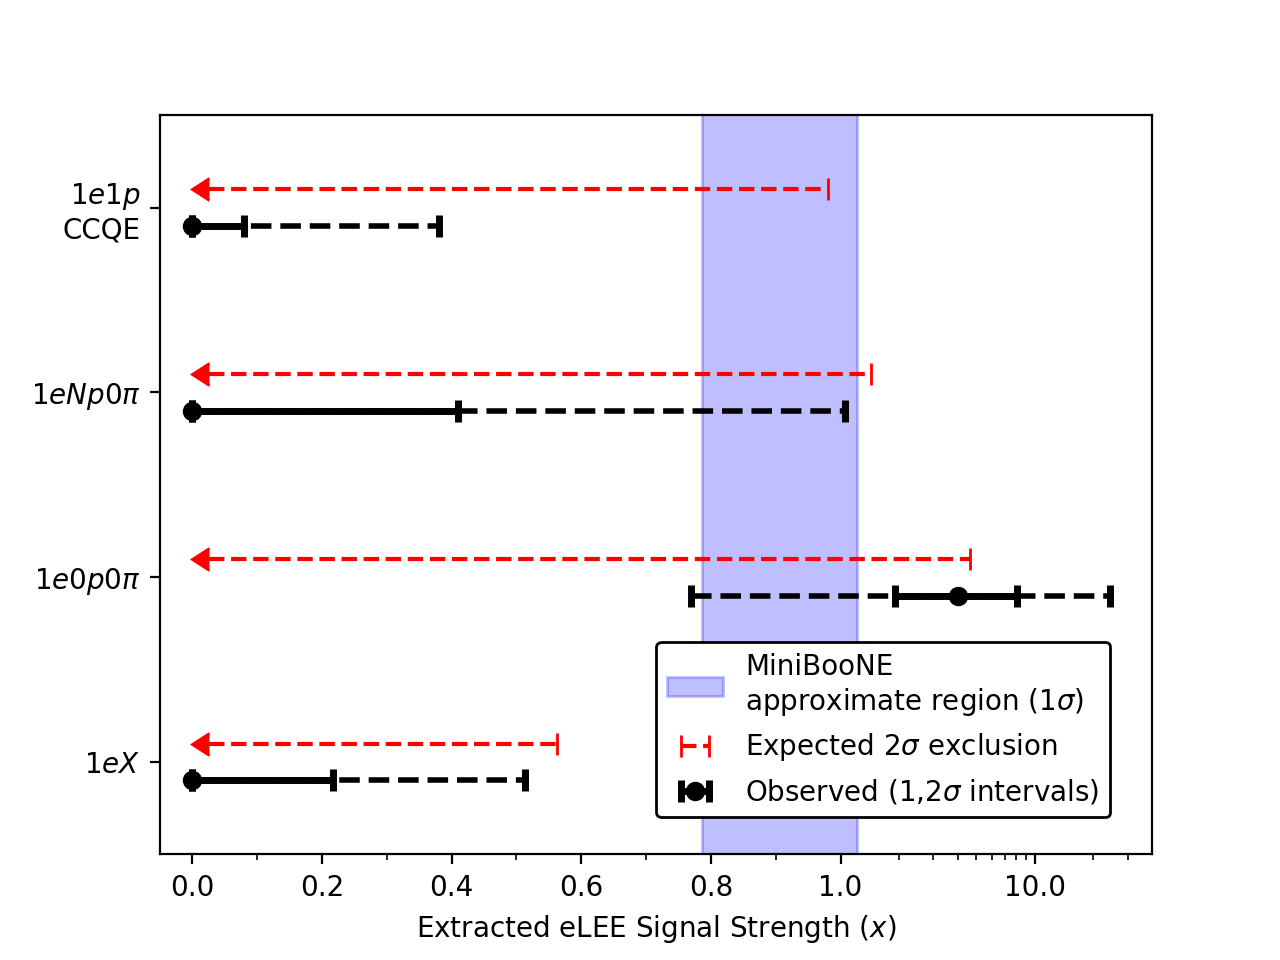

In [22]:
## Plot of x fits, horizontally oriented
## 14 Oct 2021: keeping here for posterity, but haven't made adjustments to font size or etc.
##


y_index=np.arange(3.,-1,-1) #DL on top, WC on bottom
names=df_xfit.copy()["name"]
names[0]="$1e1p$\nCCQE"
x_arrows_low=x_exp_hi_2sigma-0.025 #empirically determined

fig,ax = plt.subplots()

#sensitivity bars
eb_exp_2sig = plt.errorbar(x_exp_hi_2sigma,y_index+0.1,
                           xerr=x_arrows_low,xuplims=True,
                           fmt='o',markersize=0,color='red',capsize=4.,
                           label="Expected $2\sigma$ exclusion")
eb_exp_2sig[-1][0].set_linestyle("--")

#observed, 2sigma
eb_2sig = plt.errorbar(x_fit,y_index-0.1,
                       xerr=[x_lo_2sigma,x_hi_2sigma],
                       capsize=4.,capthick=2.5,
                       fmt='o',color='black',markersize=0)#,label="Observed ($2\sigma$ interval)")
eb_2sig[-1][0].set_linestyle("--")
eb_2sig[-1][0].set_linewidth(2.)

#observed, 1isgma
eb_1sig = plt.errorbar(x_fit,y_index-0.1,
                       xerr=[x_lo_1sigma,x_hi_1sigma],
                       fmt='o',capsize=4.,capthick=2.5,
                       color='black',
                       label="Observed ($1$,$2\sigma$ intervals)")
eb_1sig[-1][0].set_linewidth(2.5)

#mb_bands
ax.fill_between([0.0,mb_nu_all_1sigma[0],mb_nu_all_1sigma[1],40], -0.25, 3.25, where=[False,True,True,False],
                color='blue', alpha=0.25, transform=ax.get_xaxis_transform(),
                label="MiniBooNE\napproximate region ($1\sigma$)")


#linear up to 1.0, then log after that
#linscale=3.0 makes it so linear portion uses more of plot
ax.set_xscale('symlog',linthresh=1.0,linscale=3.0)
ax.set_xlim(-0.05,40.0)

#format the tick labels
ax.set_xticks(np.concatenate([np.arange(0.,1.0,0.2),[1.0,10.]]))
ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()])
ax.set_xticks(np.concatenate([np.arange(0.,1.0,0.1),np.arange(1,10,1.0),np.arange(10,40,10.0)]),minor=True)

ax.set_ylim(-0.5,3.5)
ax.set_yticks(y_index)
ax.set_yticklabels(names)

ax.set_xlabel("Extracted eLEE Signal Strength ($x$)")

plt.legend(loc=(0.5,0.05),edgecolor='black',facecolor='white',framealpha=1.0)

plt.show()

#plt.savefig("lee_signal_fits_mb.pdf")
#plt.savefig("lee_signal_fits_mb.png")
#plt.savefig("lee_signal_fits.eps")

<IPython.core.display.Javascript object>


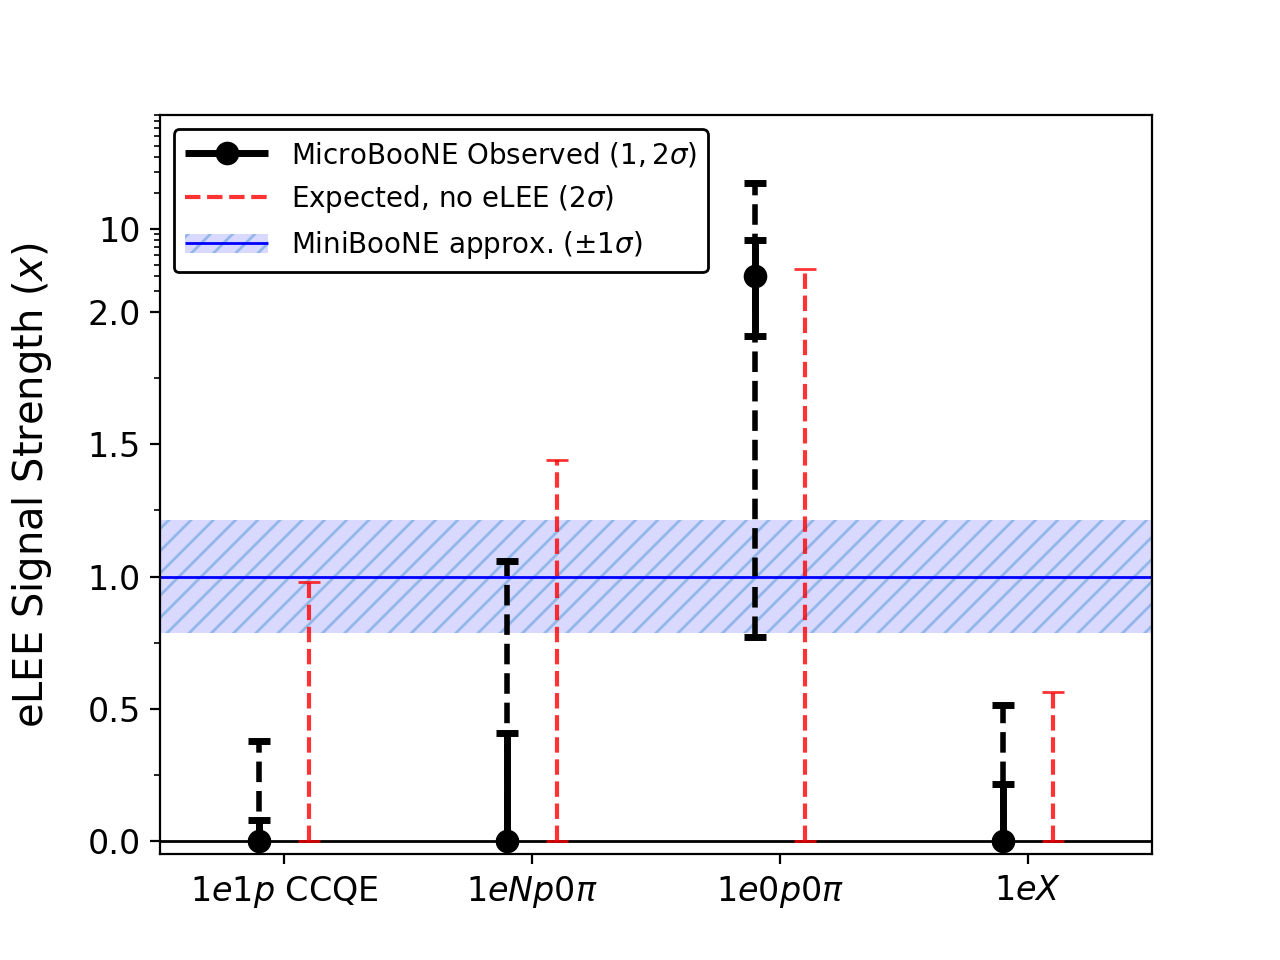

In [23]:
##Plot x fit, vertically oriented
##14 Oct 2021: this is what's used as Fig 5 in eLEE PRL
##21 Oct 2021: added hatch, and updated yticks size (still Fig5 eLEE PRL)

x_index = np.arange(0,4.)
names=df_xfit.copy()["name"]
x_arrows_low=x_exp_hi_2sigma

fig,ax = plt.subplots()

#flat line for x=0
line_x0 = ax.hlines(0.0,-0.5,x_index[-1]+0.5,
                    color='black',linestyle='-',linewidth=1.0)

#sensitivity bars
eb_exp_2sig = plt.errorbar(x_index+0.1,x_exp_hi_2sigma,
                           yerr=[x_arrows_low,np.full(len(x_index),0.)],#uplims=True,
                           fmt='o',markersize=0,color='red',capsize=4.,alpha=0.8,
                           label="Expected $2\sigma$ exclusion")
eb_exp_2sig[-1][0].set_linestyle("--")

#observed, 2sigma
eb_2sig = plt.errorbar(x_index-0.1,x_fit,
                       yerr=[x_lo_2sigma,x_hi_2sigma],
                       capsize=4.,capthick=2.5,
                       fmt='o',color='black',markersize=0)#,label="Observed ($2\sigma$ interval)")
eb_2sig[-1][0].set_linestyle("--")
eb_2sig[-1][0].set_linewidth(2.)

#observed, 1isgma
eb_1sig = plt.errorbar(x_index-0.1,x_fit,
                       yerr=[x_lo_1sigma,x_hi_1sigma],
                       fmt='o',capsize=4.,capthick=2.5,markersize=7.5,
                       color='black',
                       label="Observed ($1$,$2\sigma$ intervals)")
eb_1sig[-1][0].set_linewidth(2.5)

#mb_bands
#draw hatch separately to avoid PDF rendering problems.
hatch_x1 = ax.fill_between([x_index[0]-0.5,x_index[-1]+0.5],mb_nu_all_1sigma[0],mb_nu_all_1sigma[1],
                           color='none', edgecolor='lightblue', linewidth=0, linestyle='-',hatch="///")
fill_x1 = ax.fill_between([x_index[0]-0.5,x_index[-1]+0.5],mb_nu_all_1sigma[0],mb_nu_all_1sigma[1],
                          color='blue', alpha=0.15, linewidth=0,
                          label="MiniBooNE approx. ($\pm1\sigma$)")
line_x1 = ax.hlines(1.0,-0.5,x_index[-1]+0.5,
                    color='blue',linestyle='-',linewidth=1.0,alpha=1.)


#linear up to 1.0, then log after that
#linscale=4.0 makes it so linear portion uses more of plot
ax.set_yscale('symlog',linthresh=2.0,linscale=4.0)

#format the tick labels
ax.set_yticks(np.concatenate([np.arange(0.,2.0,0.5),[2.0,10.]]))
ax.set_yticklabels([ f"{i:.1f}" if i<=2.01 else "%d"%i for i in ax.get_yticks() ],fontsize='large')
ax.set_yticks(np.concatenate([np.arange(0.,2.0,0.25),np.arange(1,10,1.0),np.arange(10,100,10.0)]),minor=True)

ax.set_ylim(-0.05,90.0)


ax.set_xlim(x_index[0]-0.5,x_index[-1]+0.5)
ax.set_xticks(x_index)
ax.set_xticklabels(names,fontsize='large')

ax.set_ylabel("eLEE Signal Strength ($x$)",fontsize='x-large',labelpad=12)

ax.legend([(eb_1sig.lines[2],eb_1sig.lines[0]),
           eb_exp_2sig.lines[2],(hatch_x1,fill_x1,line_x1)],
          ["MicroBooNE Observed ($1,2\sigma$)",
           "Expected, no eLEE ($2\sigma$)",
           "MiniBooNE approx. ($\pm1\sigma$)"],
          #loc=(0.13,0.6),
          loc=2,
          edgecolor='black',facecolor='white',framealpha=1.0,
          prop={"size":'medium'},
          handlelength=3.0)

#ax.grid(axis='y') #this looked bad

plt.show()

plt.savefig("lee_signal_fits_mb_vertical.pdf",bbox_inches='tight')
plt.savefig("lee_signal_fits_mb_vertical.png",bbox_inches='tight')

In [24]:
##choose which selections for ratio plotting

df_ratios=df_lee[df_lee.index.isin([0,1,2,4])] #again, remove 1eXp0pi

In [96]:
#get ratio info for plotting...
data_ratio = df_ratios["observed"]/df_ratios["expected_x0"]

##if using the bayes error on the data points
##data_ratio_lo = (df_ratios["expected_x0_err_stat_bayes_lo"])/df_ratios["expected_x0"]
##data_ratio_hi = (df_ratios["expected_x0_err_stat_bayes_hi"])/df_ratios["expected_x0"]

#use CNP stat errs for datapoints
data_ratio_lo = (df_ratios["expected_x0_err_stat_cnp"])/df_ratios["expected_x0"]
data_ratio_hi = (df_ratios["expected_x0_err_stat_cnp"])/df_ratios["expected_x0"]

x0_err = df_ratios["expected_x0_err_sys"]/df_ratios["expected_x0"]

x1_ratio = df_ratios["expected_x1"]/df_ratios["expected_x0"]
x1_ratio_err = df_ratios["expected_x1_err_sys"]/df_ratios["expected_x0"]

x1_ratio_only_err = np.sqrt(np.square(df_ratios["expected_x1_err_sys"])-np.square(df_ratios["expected_x0_err_sys"]))/df_ratios["expected_x0"]

p_values_elee = df_ratios["p_x1_x0"]
p_values_elee_str = ["$1.6$ x $10^{-4}$","$0.022$","$0.927$","$1.0$ x $10^{-4}$"]

#e_range_str = df_ratios["e_sig"].apply(lambda x: "%d MeV $\leq E_{\\nu} \leq$ %d MeV"%(x[0],x[1]))
e_range_str = df_ratios["e_sig"].apply(lambda x: "[%d MeV,%d MeV]"%(x[0],x[1]))

In [72]:
e_range_str[0]

'(0.20 GeV $\\leq E_{\\nu} \\leq$ 0.50 GeV)'

In [94]:
print(e_range_str)

0    $E_{\nu}$: [200 MeV,500 MeV]
1    $E_{\nu}$: [150 MeV,650 MeV]
2    $E_{\nu}$: [150 MeV,650 MeV]
4      $E_{\nu}$: [0 MeV,600 MeV]
Name: e_sig, dtype: object


<IPython.core.display.Javascript object>


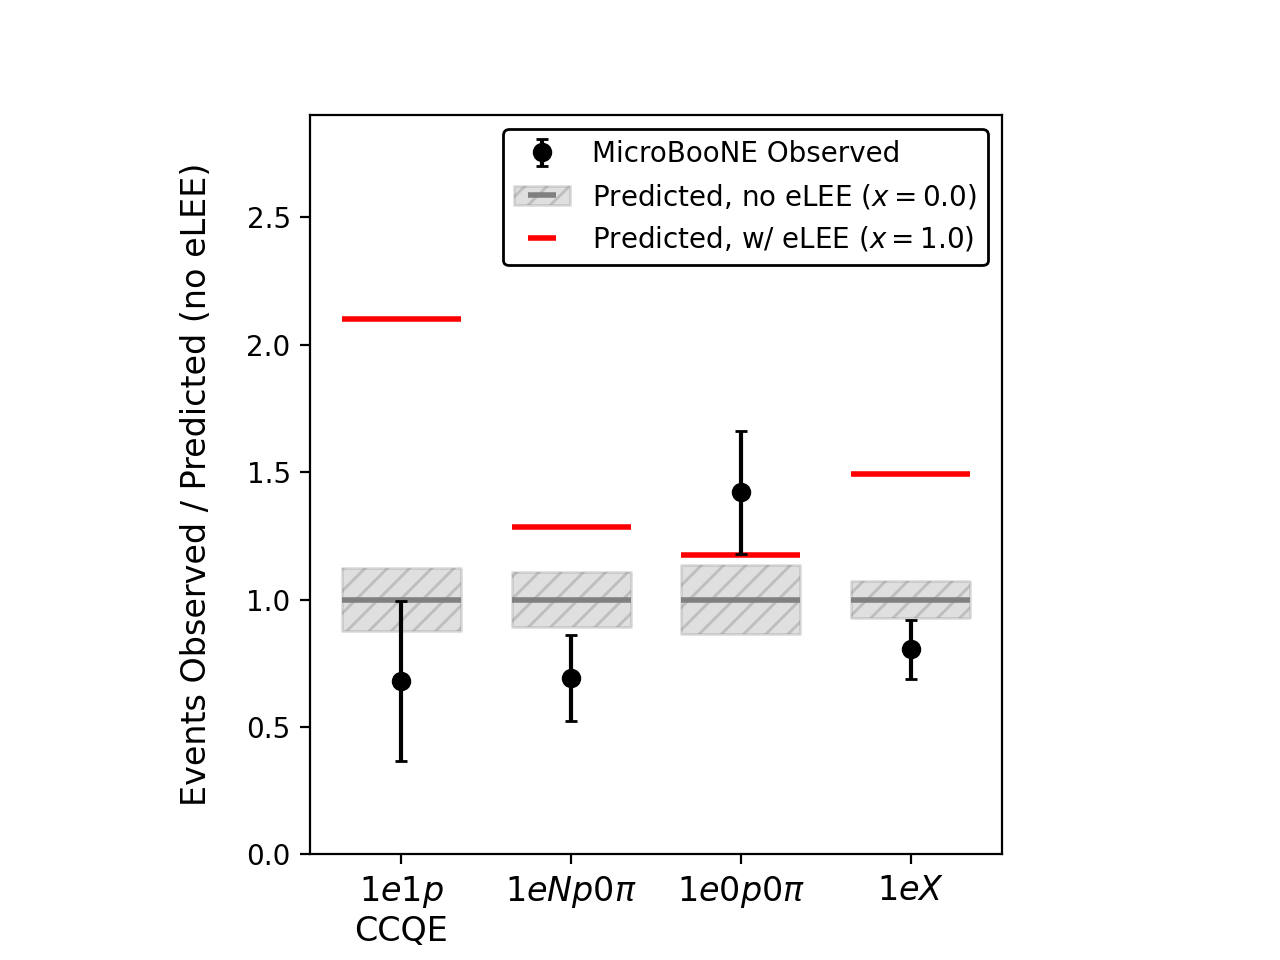

In [48]:
##Plot ratios
##14 Oct 2021: this is what's used as Fig 4 in eLEE PRL, use CNP errs
##21 Oct 2021: add hatch, this is what's used as Fig 4 in eLEE PRL (still CNP errs)

#get all the xlabels ready
x_index = np.arange(0,4.)

x_findex = np.concatenate([[x-0.5,x-0.35,x,x+0.35,x+0.5] for x in x_index])
x_fill = np.concatenate([[False,True,True,True,False] for x in x_index])
y_x0 = np.concatenate([[y,y,y,y,y] for y in x0_err])
y_x1 = np.concatenate([[y,y,y,y,y] for y in x1_ratio])
y_x1_err = np.concatenate([[y,y,y,y,y] for y in x1_ratio_only_err])

names=df_ratios.copy()["name"]
axes_labels=names
names[0]="$1e1p$\nCCQE" #put CCQE on next line

fig,ax = plt.subplots()

#plot x=0, no errs
eb_x0_ratio = plt.errorbar(x_index,np.full(len(x_index),1.0),
                           xerr=np.full(len(x_index),0.35),
                           fmt='o',markersize=0,color='gray')
eb_x0_ratio[-1][0].set_linewidth(2.)
eb_x0_hatch = ax.fill_between(x_findex,1-y_x0,1+y_x0,where=x_fill,
                               color='none',edgecolor='lightgray',linewidth=0,step='mid',hatch="///")
eb_x0_shaded = ax.fill_between(x_findex,1-y_x0,1+y_x0,where=x_fill,
                               color='gray',alpha=0.25,step='mid')


#plot x=1, no errs
eb_lee_ratio = plt.errorbar(x_index,x1_ratio,
                            xerr=np.full(len(x_index),0.35),
                            fmt='o',markersize=0,color='red')
eb_lee_ratio[-1][0].set_linewidth(2.)

#plots obs/exp(x=0)
eb_data_ratio = plt.errorbar(x_index,data_ratio,
                             yerr=[data_ratio_lo,data_ratio_hi],fmt='o',
                             color='black',capsize=2.,label="Observed")

#2.9 so we avoid the unsightly 3.0 tick mark
ax.set_ylim(0.0,2.9)

ax.set_xticks(x_index)
ax.set_xticklabels(axes_labels,fontsize='large')

ax.set_ylabel("Events Observed / Predicted (no eLEE)",
              fontsize='large',labelpad=12)
ax.legend([eb_data_ratio,(eb_x0_hatch,eb_x0_shaded,eb_x0_ratio),eb_lee_ratio],
          ["MicroBooNE Observed","Predicted, no eLEE ($x=0.0$)","Predicted, w/ eLEE ($x=1.0$)"],
         edgecolor='black',facecolor='white',framealpha=1.0)

ax.set_aspect(1.5)

plt.show()
plt.savefig("lee_signal_region_observed_ratio_err-sep.pdf",bbox_inches='tight')
plt.savefig("lee_signal_region_observed_ratio_err-sep.png",bbox_inches='tight')

<IPython.core.display.Javascript object>


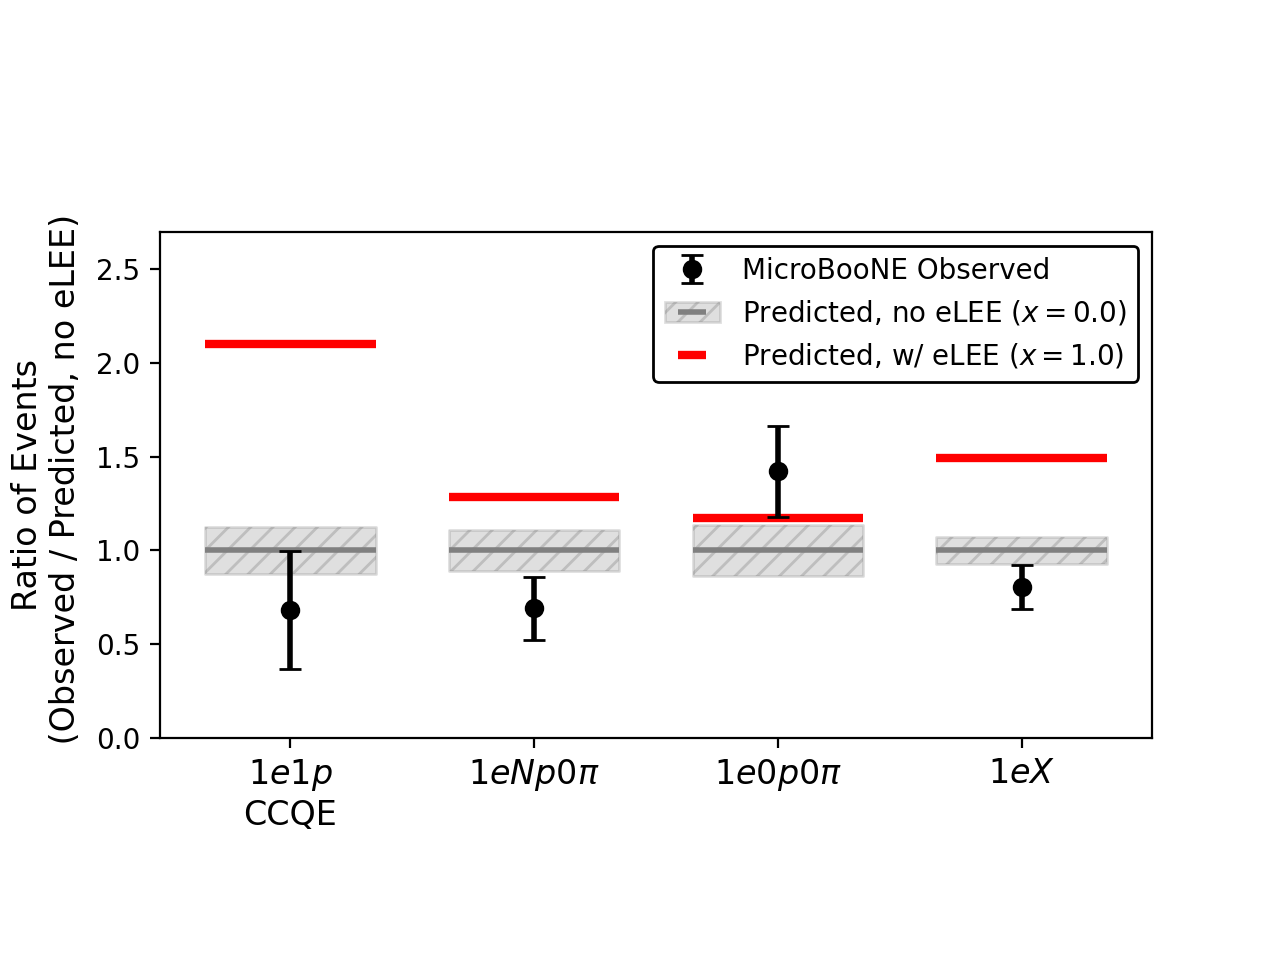

In [28]:
##Plot ratios
## 21 Oct 2021: plot with a different aspect ratio, not used in eLEE PRL

#get all the xlabels ready
x_index = np.arange(0,4.)

x_findex = np.concatenate([[x-0.5,x-0.35,x,x+0.35,x+0.5] for x in x_index])
x_fill = np.concatenate([[False,True,True,True,False] for x in x_index])
y_x0 = np.concatenate([[y,y,y,y,y] for y in x0_err])
y_x1 = np.concatenate([[y,y,y,y,y] for y in x1_ratio])
y_x1_err = np.concatenate([[y,y,y,y,y] for y in x1_ratio_only_err])

names=df_ratios.copy()["name"]
axes_labels=names
names[0]="$1e1p$\nCCQE"
#axes_labels = [ "%s\n($p_{eLEE}=$%s)"%(names[i],p_values_elee_str[i]) for i in range(len(names))]

fig,ax = plt.subplots()

#plot x=0, no errs
eb_x0_ratio = plt.errorbar(x_index,np.full(len(x_index),1.0),
                           xerr=np.full(len(x_index),0.35),
                           fmt='o',markersize=0,color='gray')
eb_x0_ratio[-1][0].set_linewidth(2.)
eb_x0_hatch = ax.fill_between(x_findex,1-y_x0,1+y_x0,where=x_fill,
                               color='none',edgecolor='lightgray',linewidth=0,step='mid',hatch="///")
eb_x0_shaded = ax.fill_between(x_findex,1-y_x0,1+y_x0,where=x_fill,
                               color='gray',alpha=0.25,step='mid')


#plot x=1, no errs
eb_lee_ratio = plt.errorbar(x_index,x1_ratio,
                            xerr=np.full(len(x_index),0.35),
                            fmt='o',markersize=0,color='red')
eb_lee_ratio[-1][0].set_linewidth(3.)

#plots obs/exp(x=0)
eb_data_ratio = plt.errorbar(x_index,data_ratio,
                             yerr=[data_ratio_lo,data_ratio_hi],fmt='o',
                             color='black',capsize=4.,label="Observed",markersize=6,linewidth=2)

#2.9 so we avoid the unsightly 3.0 tick mark
ax.set_ylim(0.0,2.7)

ax.set_xticks(x_index)
ax.set_xticklabels(axes_labels,fontsize='large')

ax.set_ylabel("Ratio of Events\n (Observed / Predicted, no eLEE)",
              fontsize='large',labelpad=5)
ax.legend([eb_data_ratio,(eb_x0_hatch,eb_x0_shaded,eb_x0_ratio),eb_lee_ratio],
          ["MicroBooNE Observed","Predicted, no eLEE ($x=0.0$)","Predicted, w/ eLEE ($x=1.0$)"],
         edgecolor='black',facecolor='white',framealpha=1.0)

#plt.legend(edgecolor='black',facecolor='white',framealpha=1.0)

ax.set_aspect(1./1.3)

plt.show()
#plt.savefig("lee_signal_region_observed_ratio_err-sep_flataspect.pdf",bbox_inches='tight')
#plt.savefig("lee_signal_region_observed_ratio_err-sep_flataspect.png",bbox_inches='tight')

<IPython.core.display.Javascript object>


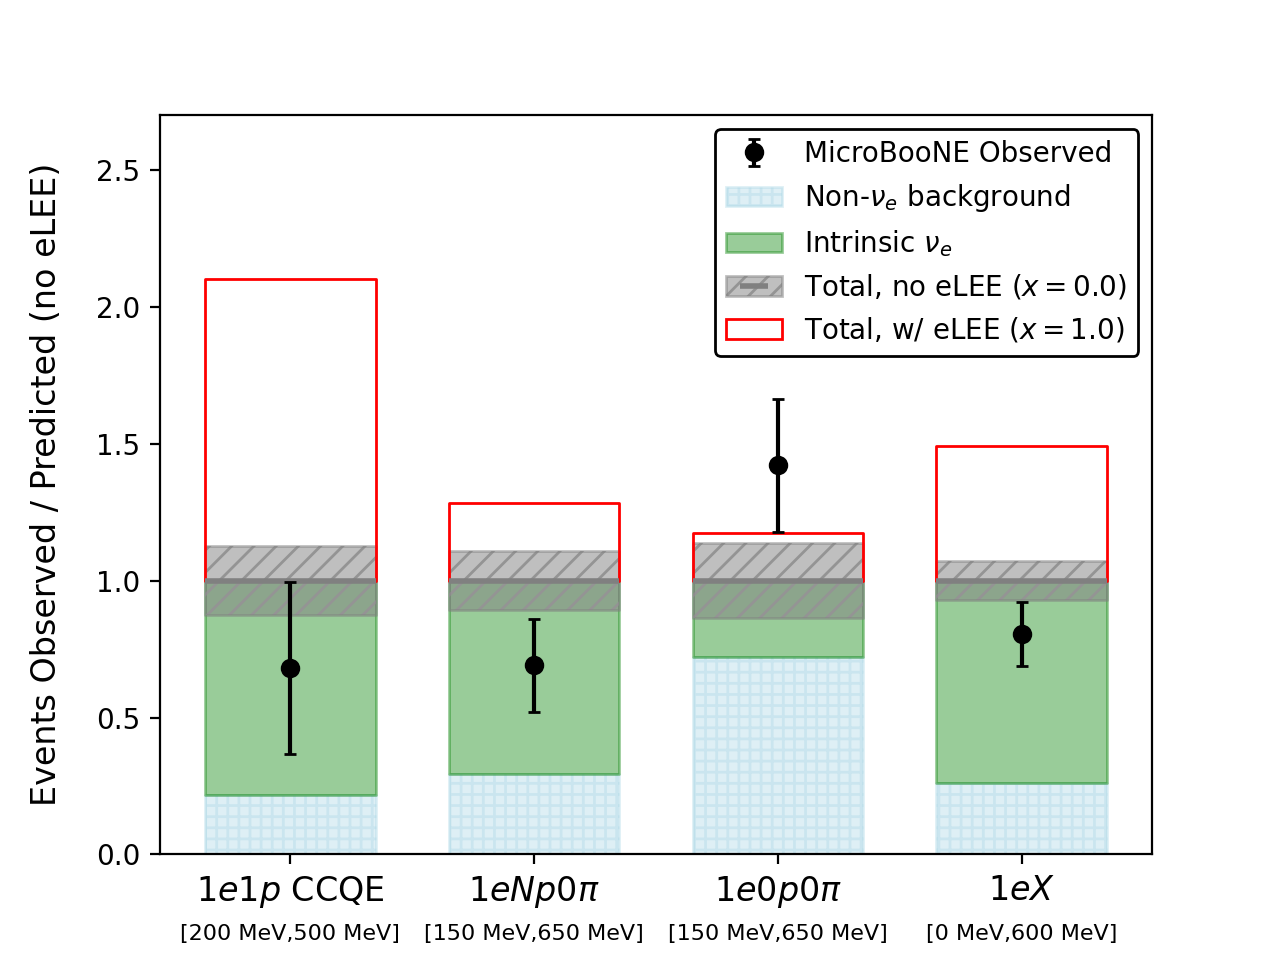

In [112]:
##Plot ratios
##14 Oct 2021: this is what's used as Fig 4 in eLEE PRL, use CNP errs
##21 Oct 2021: add hatch, this is what's used as Fig 4 in eLEE PRL (still CNP errs)

nue_ratio = df_ratios["expected_nue"]/df_ratios["expected_x0"]
non_nue_ratio = df_ratios["expected_non_nue"]/df_ratios["expected_x0"]


#get all the xlabels ready
x_index = np.arange(0,4.)

x_findex = np.concatenate([[x-0.5,x-0.35,x,x+0.35,x+0.5] for x in x_index])
x_fill = np.concatenate([[False,True,True,True,False] for x in x_index])

y_non_nue = np.concatenate([[y,y,y,y,y] for y in non_nue_ratio])
y_x0 = np.concatenate([[y,y,y,y,y] for y in x0_err])
y_x1 = np.concatenate([[y,y,y,y,y] for y in x1_ratio])
y_x1_err = np.concatenate([[y,y,y,y,y] for y in x1_ratio_only_err])

names=df_ratios.copy()["name"]
axes_labels=names
#names[0]="$1e1p$\nCCQE" #put CCQE on next line

#axes_labels=axes_labels+"\n"+e_range_str

fig,ax = plt.subplots()

#plot x=0, no errs
eb_x0_ratio = plt.errorbar(x_index,np.full(len(x_index),1.0),
                           xerr=np.full(len(x_index),0.35),
                           fmt='o',markersize=0,color='gray')
eb_x0_ratio[-1][0].set_linewidth(2.)

eb_non_nue_shaded = ax.fill_between(x_findex,np.full(len(x_findex),0.0),y_non_nue,where=x_fill,
                                    color='lightblue',alpha=0.4,step='mid',hatch="+++")
eb_nue_shaded = ax.fill_between(x_findex,y_non_nue,np.full(len(x_findex),1.0),where=x_fill,
                                color='green',alpha=0.4,step='mid')


eb_x0_hatch = ax.fill_between(x_findex,1-y_x0,1+y_x0,where=x_fill,
                               color='none',edgecolor='darkgray',linewidth=0,step='mid',hatch="///")
eb_x0_shaded = ax.fill_between(x_findex,1-y_x0,1+y_x0,where=x_fill,
                               color='gray',alpha=0.5,step='mid')




#plot x=1, no errs
eb_lee_shaded = ax.fill_between(x_findex,np.full(len(x_findex),1.0),y_x1,where=x_fill,
                               color='none',edgecolor='red',linewidth=1.0,linestyle="-",step='mid')

#eb_lee_ratio = plt.errorbar(x_index,x1_ratio,
#                            xerr=np.full(len(x_index),0.35),
#                            fmt='o',markersize=0,color='red')
#eb_lee_ratio[-1][0].set_linewidth(1.)
#eb_lee_ratio[-1][0].set_linestyle("-")

#plots obs/exp(x=0)
eb_data_ratio = plt.errorbar(x_index,data_ratio,
                             yerr=[data_ratio_lo,data_ratio_hi],fmt='o',
                             color='black',capsize=2.,label="Observed")

#2.9 so we avoid the unsightly 3.0 tick mark
ax.set_ylim(0.0,2.7)

ax.set_xticks(x_index)
xlabel_locs = ax.set_xticklabels(axes_labels,fontsize='large')

for i in range(len(xlabel_locs)):
    ax.text(i,-0.29,e_range_str.iloc[i],fontsize=8,
           horizontalalignment='center',verticalalignment='center',fontstretch='ultra-condensed')

ax.set_ylabel("Events Observed / Predicted (no eLEE)",
              fontsize='large',labelpad=12)
ax.legend([eb_data_ratio,eb_non_nue_shaded,eb_nue_shaded,
           (eb_x0_hatch,eb_x0_shaded,eb_x0_ratio),eb_lee_shaded],
          ["MicroBooNE Observed","Non-$\\nu_e$ background","Intrinsic $\\nu_e$",
           "Total, no eLEE ($x=0.0$)","Total, w/ eLEE ($x=1.0$)"],
         edgecolor='black',facecolor='white',framealpha=1.0)

#ax.set_aspect(0.5)

plt.show()
plt.savefig("lee_signal_region_observed_ratio_err-breakdown.pdf",bbox_inches='tight')
plt.savefig("lee_signal_region_observed_ratio_err-breakdown.png",bbox_inches='tight')

<IPython.core.display.Javascript object>


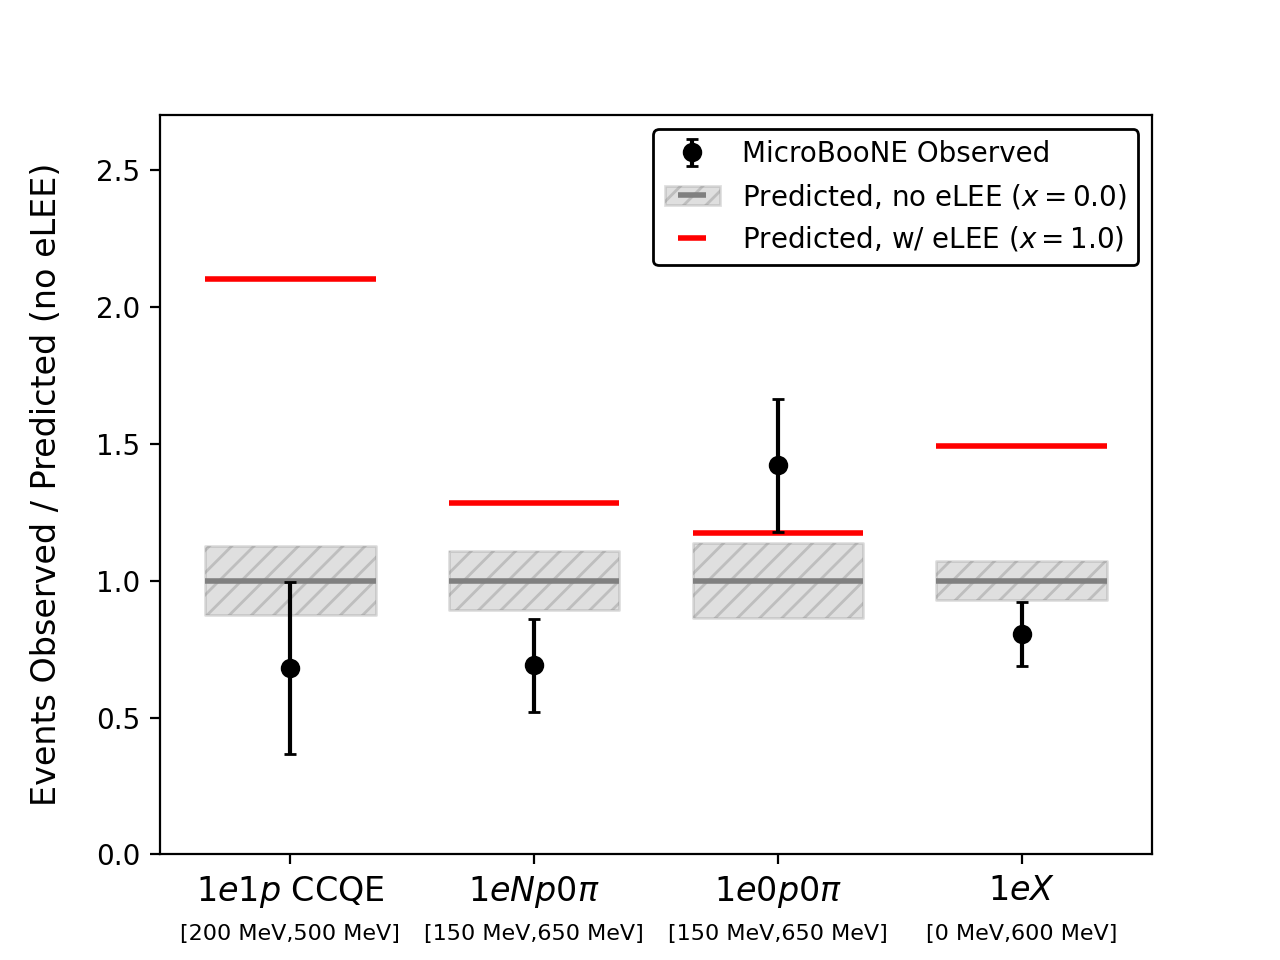

In [110]:
##Plot ratios
##14 Oct 2021: this is what's used as Fig 4 in eLEE PRL, use CNP errs
##21 Oct 2021: add hatch, this is what's used as Fig 4 in eLEE PRL (still CNP errs)

#get all the xlabels ready
x_index = np.arange(0,4.)

x_findex = np.concatenate([[x-0.5,x-0.35,x,x+0.35,x+0.5] for x in x_index])
x_fill = np.concatenate([[False,True,True,True,False] for x in x_index])
y_x0 = np.concatenate([[y,y,y,y,y] for y in x0_err])
y_x1 = np.concatenate([[y,y,y,y,y] for y in x1_ratio])
y_x1_err = np.concatenate([[y,y,y,y,y] for y in x1_ratio_only_err])

names=df_ratios.copy()["name"]
axes_labels=names
#names[0]="$1e1p$\nCCQE" #put CCQE on next line

#axes_labels=axes_labels+"\n"+e_range_str

fig,ax = plt.subplots()

#plot x=0, no errs
eb_x0_ratio = plt.errorbar(x_index,np.full(len(x_index),1.0),
                           xerr=np.full(len(x_index),0.35),
                           fmt='o',markersize=0,color='gray')
eb_x0_ratio[-1][0].set_linewidth(2.)
eb_x0_hatch = ax.fill_between(x_findex,1-y_x0,1+y_x0,where=x_fill,
                               color='none',edgecolor='lightgray',linewidth=0,step='mid',hatch="///")
eb_x0_shaded = ax.fill_between(x_findex,1-y_x0,1+y_x0,where=x_fill,
                               color='gray',alpha=0.25,step='mid')


#plot x=1, no errs
eb_lee_ratio = plt.errorbar(x_index,x1_ratio,
                            xerr=np.full(len(x_index),0.35),
                            fmt='o',markersize=0,color='red')
eb_lee_ratio[-1][0].set_linewidth(2.)

#plots obs/exp(x=0)
eb_data_ratio = plt.errorbar(x_index,data_ratio,
                             yerr=[data_ratio_lo,data_ratio_hi],fmt='o',
                             color='black',capsize=2.,label="Observed")

#2.9 so we avoid the unsightly 3.0 tick mark
ax.set_ylim(0.0,2.7)

ax.set_xticks(x_index)
xlabel_locs = ax.set_xticklabels(axes_labels,fontsize='large')

for i in range(len(xlabel_locs)):
    ax.text(i,-0.29,e_range_str.iloc[i],fontsize=8,
           horizontalalignment='center',verticalalignment='center',fontstretch='ultra-condensed')

ax.set_ylabel("Events Observed / Predicted (no eLEE)",
              fontsize='large',labelpad=12)
ax.legend([eb_data_ratio,(eb_x0_hatch,eb_x0_shaded,eb_x0_ratio),eb_lee_ratio],
          ["MicroBooNE Observed","Predicted, no eLEE ($x=0.0$)","Predicted, w/ eLEE ($x=1.0$)"],
         edgecolor='black',facecolor='white',framealpha=1.0)

#ax.set_aspect(1.5)

plt.show()
plt.savefig("lee_signal_region_observed_ratio_err-elabels.pdf",bbox_inches='tight')
plt.savefig("lee_signal_region_observed_ratio_err-elabels.png",bbox_inches='tight')